# **QSAR Model Building of Acetylcholinesterase Inhibitors**

Chanin Nantasenamat

*Data Professor YouTube channel, http://youtube.com/dataprofessor*

In [11]:
pip install scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.2/13.2 MB 2.0 MB/s eta 0:00:000:00:010:00:01:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.8/40.8 MB 2.2 MB/s eta 0:00:00m eta 0:00:010:01:02
Note: you may need to restart the kernel to use updated packages.


In [19]:
pip install matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 2.0 MB/s eta 0:00:000:00:010:00:01:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 2.9 MB/s eta 0:00:002.9 MB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 3.2 MB/s eta 0:00:003.4 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


# Read in data

In [2]:
import pandas as pd

In [4]:
dataset_url = 'https://raw.githubusercontent.com/nafamubarokhusni/MALT1-Classification-Tugas-Besar-Bioinformatika/main/3.%20PaDEL%20descriptor%20Dataset/MALT1_06_bioactivity_data_3class_pIC50_pubchem_fp.csv'
dataset = pd.read_csv(dataset_url)
dataset

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,pIC50
0,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.397940
1,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.795880
2,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.036212
3,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.823909
4,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.481486
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.250264
370,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.603801
371,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.292430
372,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,7.251812


In [5]:
X = dataset.drop(['pIC50'], axis=1)
X

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
370,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
371,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
372,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [6]:
Y = dataset.iloc[:,-1]
Y

0      6.397940
1      5.795880
2      5.036212
3      5.823909
4      5.481486
         ...   
369    6.250264
370    6.603801
371    6.292430
372    7.251812
373    7.221849
Name: pIC50, Length: 374, dtype: float64

# Remove low variance features

In [12]:
from sklearn.feature_selection import VarianceThreshold

def remove_low_variance(input_data, threshold=0.1):
    selection = VarianceThreshold(threshold)
    selection.fit(input_data)
    return input_data[input_data.columns[selection.get_support(indices=True)]]

X = remove_low_variance(X, threshold=0.1)
X

,PubchemFP2,PubchemFP16,PubchemFP19,PubchemFP20,PubchemFP23,PubchemFP24,PubchemFP33,PubchemFP34,PubchemFP37,PubchemFP38,...,PubchemFP750,PubchemFP758,PubchemFP764,PubchemFP780,PubchemFP784,PubchemFP791,PubchemFP792,PubchemFP813,PubchemFP821,PubchemFP827
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,1,1,1,0,0,0,1,0,1,1,...,0,0,0,1,0,0,1,0,0,0
370,1,1,1,0,0,0,1,1,1,1,...,0,0,0,1,0,0,1,0,0,0
371,1,1,1,0,0,0,1,0,1,1,...,0,0,0,1,0,0,1,0,0,0
372,1,1,1,0,1,0,1,0,1,1,...,0,0,0,1,0,0,1,0,0,0


In [13]:
X.to_csv('descriptor_list.csv', index = False)

In [72]:
# In the app, use the following to get this same descriptor list
# of 218 variables from the initial set of 881 variables
# Xlist = list(pd.read_csv('descriptor_list.csv').columns)
# X[Xlist]

# Random Forest Regression Model

In [14]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [15]:
model = RandomForestRegressor(n_estimators=500, random_state=42)
model.fit(X, Y)
r2 = model.score(X, Y)
r2

0.8848822097126819

## Model Prediction

In [16]:
Y_pred = model.predict(X)
Y_pred

array([5.87337985, 5.73757285, 5.34880295, 5.87337985, 5.87337985,
       5.62873558, 5.19827194, 5.45305194, 5.09953666, 5.46273371,
       5.29565878, 5.34673923, 5.19019928, 5.60716953, 4.61416485,
       4.94213512, 4.96000446, 5.0543187 , 4.92936661, 5.01371263,
       5.50878209, 4.88831146, 5.40985365, 5.45305194, 5.45305194,
       5.45305194, 5.24336462, 9.95145494, 9.33581108, 8.66795161,
       9.86549044, 9.52798976, 8.9348563 , 5.26715808, 5.62873558,
       4.91244265, 4.15743215, 4.82098753, 4.82098753, 4.65413718,
       4.55039739, 3.81421417, 4.77101237, 4.23087747, 4.70045613,
       4.14032407, 4.53163492, 4.23087747, 5.26715808, 4.23087747,
       4.82248721, 4.23087747, 5.97477854, 6.87921106, 6.83530387,
       5.69279948, 6.13393262, 5.25573829, 4.51404471, 4.59763498,
       5.44513905, 6.01543091, 6.96764356, 6.84609421, 6.73936499,
       4.96739291, 6.10950197, 6.50757426, 7.66985963, 7.81185592,
       7.50434574, 7.35831782, 7.20616624, 6.32826868, 5.74117

## Model Performance

In [17]:
print('Mean squared error (MSE): %.2f'
      % mean_squared_error(Y, Y_pred))
print('Coefficient of determination (R^2): %.2f'
      % r2_score(Y, Y_pred))

Mean squared error (MSE): 0.18
Coefficient of determination (R^2): 0.88


# Data Visualization (Experimental vs Predicted pIC50 for Training Data)

In [20]:
import matplotlib.pyplot as plt
import numpy as np

Text(0.5, 0, 'Experimental pIC50')

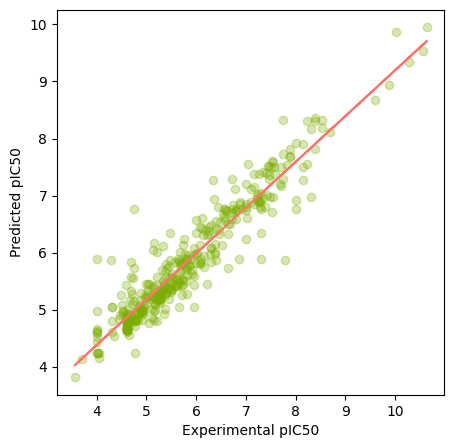

In [21]:
plt.figure(figsize=(5,5))
plt.scatter(x=Y, y=Y_pred, c="#7CAE00", alpha=0.3)

# Add trendline
# https://stackoverflow.com/questions/26447191/how-to-add-trendline-in-python-matplotlib-dot-scatter-graphs
z = np.polyfit(Y, Y_pred, 1)
p = np.poly1d(z)

plt.plot(Y,p(Y),"#F8766D")
plt.ylabel('Predicted pIC50')
plt.xlabel('Experimental pIC50')

# Save Model as Pickle Object

In [22]:
import pickle

In [23]:
pickle.dump(model, open('MALT1_model.pkl', 'wb'))